In [1]:
import pandas as pd
import numpy as np
import csv
import librosa
from scipy import signal
from pathlib import Path
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
song1 = r"C:\Users\Mahip\Downloads\yaman_raag\Aansu Bhari Hai.mp3"
song2 = r"C:\Users\Mahip\Downloads\yaman_raag\Aaye Ho Meri Zindagi Mein.mp3"
song3= r"C:\Users\Mahip\Downloads\yaman_raag\Abhi na jao Chor kar.mp3"
song4= r"C:\Users\Mahip\Downloads\yaman_raag\Bhooli-Hui-Yaadon.mp3"
song5= r"C:\Users\Mahip\Downloads\yaman_raag\Chandan Sa Badan.mp3"
song6= r"C:\Users\Mahip\Downloads\yaman_raag\chhupa lo dil mein yun.mp3"
song7= r"C:\Users\Mahip\Downloads\yaman_raag\JA_RE_BADRA_BAIRI_JA.mp3"
song8= r"C:\Users\Mahip\Downloads\yaman_raag\Jiya_Le_Gayo_Ji_Mora_Sanwariya.mp3"
song9= r"C:\Users\Mahip\Downloads\yaman_raag\Man-Re-Tu-Kahe-Na.mp3"
song10 =  r"C:\Users\Mahip\Downloads\yaman_raag\Zindagi_ Bhar_ Nahin_Bhoolegi.mp3"
songlist = [song1,song2,song3,song4,song5,song6,song7,song8,song9,song10]

In [3]:
ylist = [[] for i in range(10)]
for i in range(10):
    ylist[i], sr = librosa.load(songlist[i])
    

In [4]:
chromalist = [[] for i in range(10)]

for i in range(10):
    chromalist[i] = librosa.feature.chroma_stft(ylist[i])

In [5]:
def calculate_corrcoef(array1 , array2):
    if(len(array1) > len(array2)):
        number_of_zeros= len(array1) - len(array2)
        new_array = np.pad(array2 , (0 , number_of_zeros) , 'constant')
        
        r , p = pearsonr(array1, new_array)
        
        
        
    else:
        number_of_zeros = len(array2) - len(array1)
        new_array= np.pad(array1 , (0 , number_of_zeros) , 'constant')
        
        r , p = pearsonr(new_array, array2)
    
    return r

In [6]:
def plot_and_corelate(array1 , array2):
    
    corr = signal.correlate(array1 , array2)
    
    fig,axs = plt.subplots(3,1)
    axs[0].plot(array1)
    axs[0].set_ylabel('Original')
    axs[1].plot(array2)
    axs[1].set_ylabel('Mean')
    axs[2].plot(corr)
    axs[2].set_ylabel('correlation')
    
    plt.show()
    
    print(calculate_corrcoef(array1 , array2))

In [7]:
tempist=[]
for i in range(12):
    tempist.append(calculate_corrcoef(chromalist[0][i] , chromalist[9][i]))

In [8]:
tempist

[0.01955371055503401,
 0.0076716286333969545,
 -0.0014988462147274852,
 -0.021529049577496528,
 -0.029638253983644065,
 -0.035105141359186194,
 0.007245902470728818,
 -0.041968829001571596,
 -0.016588986829597998,
 -0.05263248980806072,
 -0.036294959666458654,
 -0.000254160293042229]

In [10]:
df = pd.DataFrame(data=None)

In [11]:
df["A-J"]=tempist

In [12]:
df

,A-J
0,0.019554
1,0.007672
2,-0.001499
3,-0.021529
4,-0.029638
5,-0.035105
6,0.007246
7,-0.041969
8,-0.016589
9,-0.052632


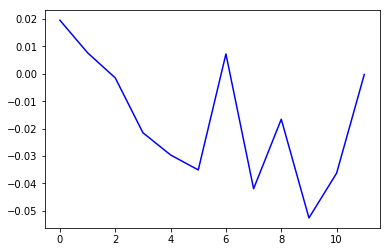

In [13]:
plt.plot(df, color="blue") # blue line

In [14]:
song1 = r"C:\Users\Mahip\Downloads\bhairavi\Do Hanso Ka Joda.mp3"
song2 = r"C:\Users\Mahip\Downloads\bhairavi\Film Street Singer.mp3"
song3 = r"C:\Users\Mahip\Downloads\bhairavi\Hansta Hua Noorani Chehra.mp3"
song4 = r"C:\Users\Mahip\Downloads\bhairavi\Humein Tumse Pyaar Kitna.mp3"
song5 = r"C:\Users\Mahip\Downloads\bhairavi\Ka Karoon Sajani.mp3"
song6 = r"C:\Users\Mahip\Downloads\bhairavi\Meethe Bol Bole.mp3"
song7 = r"C:\Users\Mahip\Downloads\bhairavi\Nache Man Mora.mp3"
song8 = r"C:\Users\Mahip\Downloads\bhairavi\suno chhoti si gudiya.mp3"
song9 = r"C:\Users\Mahip\Downloads\bhairavi\Tu ganga ki mauj.mp3"
song10 = r"C:\Users\Mahip\Downloads\bhairavi\Tumko Hamari Umar.mp3"

songlist1 = [song1,song2,song3,song4,song5,song6,song7,song8,song9,song10]

In [15]:
ylist1 = [[] for i in range(10)]
for i in range(10):
    ylist1[i], sr = librosa.load(songlist1[i])

chromalist1 = [[] for i in range(10)]

for i in range(10):
    chromalist1[i] = librosa.feature.chroma_stft(ylist1[i])

In [16]:
df1 = pd.DataFrame(data=None)

In [17]:
tempist=[]
for i in range(12):
    tempist.append(calculate_corrcoef(chromalist1[0][i] , chromalist1[9][i]))

In [18]:
df1["A1-J1"] = tempist

In [19]:
df1

,A1-J1
0,0.000816
1,-0.014522
2,-0.002278
3,-0.035939
4,-0.003337
5,-0.003700
6,-0.013030
7,-0.038193
8,-0.006254
9,-0.004999


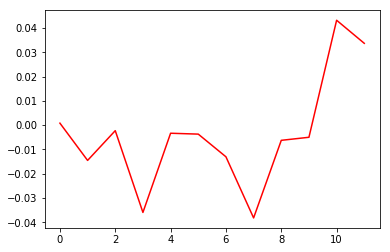

In [20]:
plt.plot(df1, color="red")

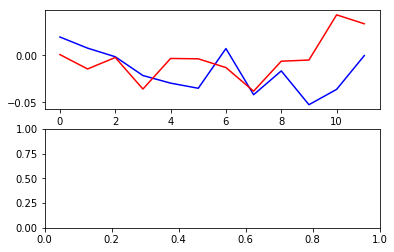

In [21]:
fig, axs = plt.subplots(2,1)
axs[0].plot(df , color='blue')
axs[0].plot(df1 , color='red')


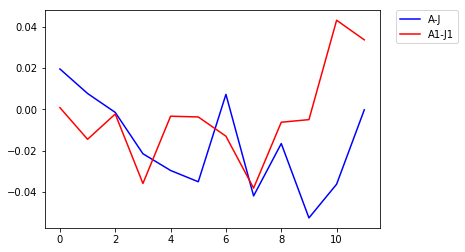

In [22]:
ax = df.plot(color='blue')
df1.plot(ax=ax, color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
df2 = pd.DataFrame(data=None)

In [55]:
tempist=[]
for i in range(12):
    tempist.append(calculate_corrcoef(chromalist1[0][i] , chromalist1[9][i]))

In [56]:
df2["A-J1"] = tempist

In [57]:
df2

,A-A1,A-B1,A-C1,A-D1,A-E1,A-F1,A-G1,A-H1,A-I1,A-J1
0,1.0,-0.042169,0.004304,-0.010717,0.036176,0.011499,0.044728,0.016679,0.038164,0.000816
1,1.0,0.045316,0.042121,-0.060170,-0.032734,-0.006454,-0.029228,0.005385,-0.018070,-0.014522
2,1.0,-0.010123,0.012166,-0.008805,0.029034,0.030227,-0.014074,-0.010092,-0.028229,-0.002278
3,1.0,-0.026782,0.034015,-0.054342,0.014078,0.036863,-0.006136,-0.001015,-0.033036,-0.035939
4,1.0,-0.008657,-0.024747,-0.008623,0.009500,0.060629,-0.057562,-0.008755,-0.025443,-0.003337
5,1.0,0.003724,0.008664,0.033911,0.056129,0.030612,-0.043181,-0.008197,-0.007188,-0.003700
6,1.0,0.024932,-0.025464,-0.051099,0.064866,0.034898,-0.030214,-0.037288,-0.023673,-0.013030
7,1.0,0.019572,-0.013243,-0.013052,0.020110,0.022851,0.002509,-0.012106,0.004032,-0.038193
8,1.0,-0.014411,0.008147,-0.075502,0.023149,0.033601,-0.023568,0.031248,0.001466,-0.006254
9,1.0,-0.014521,0.037514,-0.067118,-0.011345,-0.000340,-0.010574,0.014399,-0.017502,-0.004999
